<a href="https://colab.research.google.com/github/sindoll2/github-project/blob/main/membrane_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
myfile = files.upload()

Saving membranedata.csv to membranedata.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew
#
import torch
from torch.autograd import Variable
from sklearn.preprocessing import StandardScaler
import torch.nn as nn 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_path = "C:\\Users\\sindol\\Desktop" 

In [ ]:
print(data_path)

C:\Users\sindol\Desktop


In [ ]:
cols = ['癤풞uthor', 'Year', 'Membrane AL Type', 'Manufacture',  'Membrane Direction', 'Flow Orientation\n(counter / cocurrent)', 'Feed Solution (FS)', 'FS Molarity (M)', 'FS Osmotic pressure\n(atm)', 'Draw Solution (DS)',
         'DS Osmotic pressure\n(atm)', 'P Difference\n(atm)',  'FS Velocity (cm/s)',  'DS Velocity (cm/s)',  'FS Temperature\n(°C)',  'DS Temperature (°C)', 'Membrane Flux \n(LMH)',  'Reverse Salt Flux\n(mol/m2 hr)',
          'A\n(LMH/atm)', 'B\n(LMH)']
data = pd.read_csv('membranedata.csv', encoding='cp949')
data = data.dropna()
print(data)

          癤풞uthor  Year Membrane AL Type Manufacture Membrane Direction  \
0    Arena et al.  2015              TFC       Oasys              AL-FS   
1    Arena et al.  2015              TFC       Oasys              AL-FS   
2    Arena et al.  2015              TFC       Oasys              AL-FS   
3    Arena et al.  2015              TFC       Oasys              AL-DS   
4    Arena et al.  2015              TFC       Oasys              AL-DS   
..            ...   ...              ...         ...                ...   
632    Xia et al.  2017              TFC   Aquaporin              AL-DS   
633    Xia et al.  2017              TFC   Aquaporin              AL-DS   
634    Xia et al.  2017              TFC   Aquaporin              AL-DS   
635    Xia et al.  2017              TFC   Aquaporin              AL-FS   
636    Xia et al.  2017              TFC   Aquaporin              AL-DS   

    Flow Orientation\n(counter / cocurrent) Feed Solution (FS)  \
0                                

In [ ]:
data_cols = ['癤풞uthor', 'Year', 'Membrane AL Type', 'Manufacture',  'Membrane Direction', 'Flow Orientation\n(counter / cocurrent)', 'Feed Solution (FS)', 'FS Molarity (M)', 'FS Osmotic pressure\n(atm)', 'Draw Solution (DS)',
         'DS Osmotic pressure\n(atm)', 'P Difference\n(atm)',  'FS Velocity (cm/s)',  'DS Velocity (cm/s)',  'FS Temperature\n(째C)',  'DS Temperature (째C)', 'Membrane Flux \n(LMH)',  'Reverse Salt Flux\n(mol/m2 hr)',
          'A\n(LMH/atm)']
membrane_df = data[data_cols]
membrane_df.head()

,癤풞uthor,Year,Membrane AL Type,Manufacture,Membrane Direction,Flow Orientation\n(counter / cocurrent),Feed Solution (FS),FS Molarity (M),FS Osmotic pressure\n(atm),Draw Solution (DS),DS Osmotic pressure\n(atm),P Difference\n(atm),FS Velocity (cm/s),DS Velocity (cm/s),FS Temperature\n(째C),DS Temperature (째C),Membrane Flux \n(LMH),Reverse Salt Flux\n(mol/m2 hr),A\n(LMH/atm)
0,Arena et al.,2015,TFC,Oasys,AL-FS,counter,DI,0.0,0.0,NaCl,67.11,67.11,25.0,25.0,20.0,20.0,23.84,0.11,0.36
1,Arena et al.,2015,TFC,Oasys,AL-FS,counter,DI,0.0,0.0,NaCl,44.74,44.74,25.0,25.0,20.0,20.0,20.00,0.06,0.45
2,Arena et al.,2015,TFC,Oasys,AL-FS,counter,DI,0.0,0.0,NaCl,22.37,22.37,25.0,25.0,20.0,20.0,14.52,0.04,0.65
3,Arena et al.,2015,TFC,Oasys,AL-DS,counter,DI,0.0,0.0,NaCl,67.11,67.11,25.0,25.0,20.0,20.0,51.74,0.28,0.77
4,Arena et al.,2015,TFC,Oasys,AL-DS,counter,DI,0.0,0.0,NaCl,44.74,44.74,25.0,25.0,20.0,20.0,43.20,0.21,0.97


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(membrane_df['A\n(LMH/atm)'])
y = le.transform(membrane_df['A\n(LMH/atm)'])

le.classes_, y[:17], np.unique(y)


x = pd.get_dummies(membrane_df[membrane_df.columns[:-1]])
x.iloc[:2]

df = x.copy()
df['A\n(LMH/atm)'] = y
df.head()


,Year,FS Molarity (M),FS Osmotic pressure\n(atm),DS Osmotic pressure\n(atm),P Difference\n(atm),FS Velocity (cm/s),DS Velocity (cm/s),FS Temperature\n(째C),DS Temperature (째C),Membrane Flux \n(LMH),...,Draw Solution (DS)_MgSO4,Draw Solution (DS)_NH4Cl,Draw Solution (DS)_NH4H2PO4,Draw Solution (DS)_NH4HCO3,Draw Solution (DS)_NH4NO3,Draw Solution (DS)_Na2SO4,Draw Solution (DS)_NaCl,Draw Solution (DS)_NaNO3,Draw Solution (DS)_Urea,A\n(LMH/atm)
0,2015,0.0,0.0,67.11,67.11,25.0,25.0,20.0,20.0,23.84,...,0,0,0,0,0,0,1,0,0,32
1,2015,0.0,0.0,44.74,44.74,25.0,25.0,20.0,20.0,20.00,...,0,0,0,0,0,0,1,0,0,40
2,2015,0.0,0.0,22.37,22.37,25.0,25.0,20.0,20.0,14.52,...,0,0,0,0,0,0,1,0,0,57
3,2015,0.0,0.0,67.11,67.11,25.0,25.0,20.0,20.0,51.74,...,0,0,0,0,0,0,1,0,0,65
4,2015,0.0,0.0,44.74,44.74,25.0,25.0,20.0,20.0,43.20,...,0,0,0,0,0,0,1,0,0,73


(307, 68) (245, 68) (62, 68)
epoch 0, loss 1.711471676826477
epoch 50, loss 0.1717701554298401
epoch 100, loss 0.15761815011501312
epoch 150, loss 0.1538275182247162
epoch 200, loss 0.15197665989398956
epoch 250, loss 0.15083196759223938
epoch 300, loss 0.15002308785915375
epoch 350, loss 0.14939796924591064
epoch 400, loss 0.1488831490278244
epoch 450, loss 0.1484398990869522


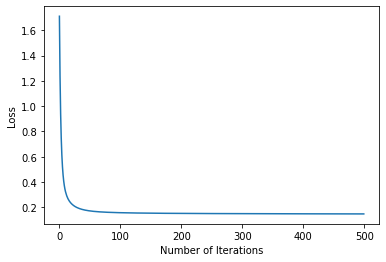

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

y = df['A\n(LMH/atm)']
y = y.values.reshape(-1,1)
X = df.drop(columns='A\n(LMH/atm)')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=40)
print(X.shape, X_train.shape, X_test.shape)

sc_x = StandardScaler()
X_train_scaled = sc_x.fit_transform(X_train)
X_test_scaled = sc_x.transform(X_test)
sc_y = StandardScaler()


y_train_scaled = sc_y.fit_transform(y_train)
y_test_scaled = sc_y.transform(y_test)
X_train_scaled = np.array(X_train_scaled,dtype=np.float32)
y_train_scaled = np.array(y_train_scaled,dtype=np.float32)
# Convert inputs and targets to tensors
inputs = torch.from_numpy(X_train_scaled)
targets = torch.from_numpy(y_train_scaled)

class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        super(LinearRegression,self).__init__()
        # Linear function.
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,X): # x:inputs
        return self.linear(X)
    
# define model
input_dim = 68
output_dim = 1
model = LinearRegression(input_dim,output_dim) # 
#model.fit(X_train, y_train)

# MSE
mse = nn.MSELoss()

# Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

# train model
loss_list = []
iteration_number = 500
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(inputs)
    
    # Calculate Loss
    loss = mse(results, targets)
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))



plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
y_pred = LinearRegression.predict(X_test)
y_pred



AttributeError: ignored